In [5]:
import pandas as pd
import numpy as np

df = pd.read_csv('titanic.csv')

In [6]:
def custom_hist(ls, interval):
    hist_ls_dict = dict()
    min_ls = np.min(ls)
    max_ls = np.max(ls)
    I = np.ceil((max_ls - min_ls) / interval)
    for j in range(interval):
        hist_ls_dict[str(min_ls+j*I) + "-" + str(min_ls+(j+1)*I)]=len(ls[(ls>=j*I+min_ls) & (ls<=(j+1)*I+min_ls)])
    return hist_ls_dict
        
print(custom_hist(df['Age'].dropna().values, 16))

{'0.42-5.42': 44, '5.42-10.42': 20, '10.42-15.42': 19, '15.42-20.42': 96, '20.42-25.42': 122, '25.42-30.42': 108, '30.42-35.42': 88, '35.42-40.42': 67, '40.42-45.42': 47, '45.42-50.42': 39, '50.42-55.42': 24, '55.42-60.42': 18, '60.42-65.42': 14, '65.42-70.42': 3, '70.42-75.42': 4, '75.42-80.42': 1}


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 <a list of 16 Text xticklabel objects>)

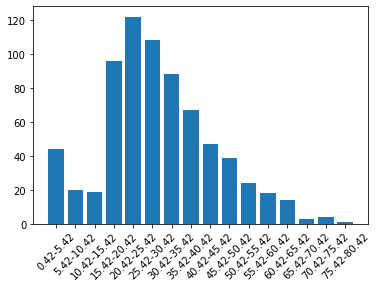

In [7]:
import matplotlib.pyplot as plt

hist_dict = custom_hist(df['Age'].dropna().values, 16)
 
plt.bar(hist_dict.keys(), hist_dict.values())
plt.xticks(rotation=45)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 <a list of 16 Text xticklabel objects>)

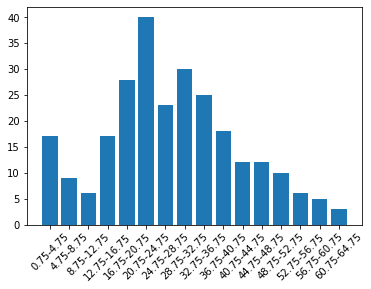

In [12]:
fem, mal = df.groupby("Sex")["Age"].agg(custom_hist, 16)

plt.bar(fem.keys(), fem.values())
plt.xticks(rotation=45)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 <a list of 16 Text xticklabel objects>)

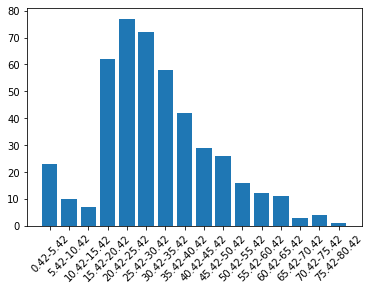

In [13]:
plt.bar(mal.keys(), mal.values())
plt.xticks(rotation=45)

Sex
female    AxesSubplot(0.125,0.125;0.775x0.755)
male      AxesSubplot(0.125,0.125;0.775x0.755)
Name: Age, dtype: object

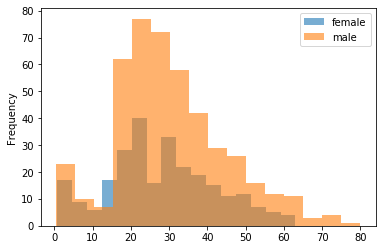

In [15]:
(df.groupby("Sex")["Age"]).plot(kind='hist', bins=16, alpha=0.6, legend=True)